In [88]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

In [89]:
house_price = pd.read_csv('train.csv')

In [90]:
house_price.shape

(1168, 81)

In [91]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [92]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [46]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking null values

In [93]:
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)

PoolQC          0.99
MiscFeature     0.96
Alley           0.93
Fence           0.80
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.05
GarageCond      0.05
GarageYrBlt     0.05
GarageFinish    0.05
GarageQual      0.05
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

#### Considering 10% as my threshold and dropping the column having more then the threshold

In [94]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/len(house_price.index),2).values>0.10]

LotFrontage    0.18
Alley          0.93
FireplaceQu    0.47
PoolQC         0.99
Fence          0.80
MiscFeature    0.96
dtype: float64

In [95]:
house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

#### Checking the columns where the missing values between 0-10%

In [96]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/ len(house_price.index),2).values>0.00]
                                                                

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.05
GarageYrBlt     0.05
GarageFinish    0.05
GarageQual      0.05
GarageCond      0.05
dtype: float64

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [97]:
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
304,1986,1986,1986.0,2006,24,24,24.0,4
823,1940,1955,1966.0,2008,70,55,44.0,2
434,1966,1966,1966.0,2006,44,44,44.0,4
28,1922,1950,1922.0,2006,88,60,88.0,4
911,1995,1996,1995.0,2006,15,14,15.0,4
1113,1962,1962,1977.0,2007,48,48,33.0,3
368,1956,1956,1956.0,2009,54,54,54.0,1
185,2007,2008,2007.0,2008,3,2,3.0,2
443,1964,1964,1964.0,2008,46,46,46.0,2
82,1962,1981,1962.0,2006,48,29,48.0,4


#### Lets drop the actual Year columns

In [98]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Imputing missing value

Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [99]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [100]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis='columns')

#### 'Id' column is also of no use for our analysis hence dropping the column

In [101]:
house_price = house_price.drop('Id',axis='columns')

In [102]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,10484.749144,6.104452,5.595890,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,...,23.015411,3.639555,15.051370,3.448630,47.315068,181477.005993,39.069349,25.241438,30.008562,2.195205
std,41.940650,8957.442311,1.390153,1.124343,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,...,63.191089,29.088867,55.080816,44.896939,543.264432,79105.586863,30.145255,20.785185,25.325066,1.329738
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7621.500000,5.000000,5.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,130375.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9522.500000,6.000000,5.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163995.000000,38.000000,17.000000,25.500000,2.000000
75%,70.000000,11515.500000,7.000000,6.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,215000.000000,56.000000,44.000000,48.000000,3.000000
max,190.000000,164660.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,135.000000,60.000000,110.000000,4.000000


#### Lets plot some graph for the EDA purpose

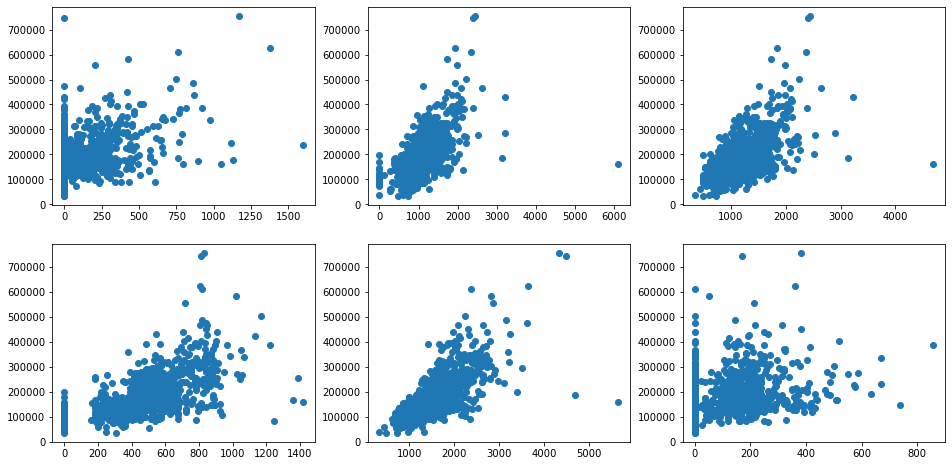

In [103]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

#### Plotting heatmap to check the corellation between varables

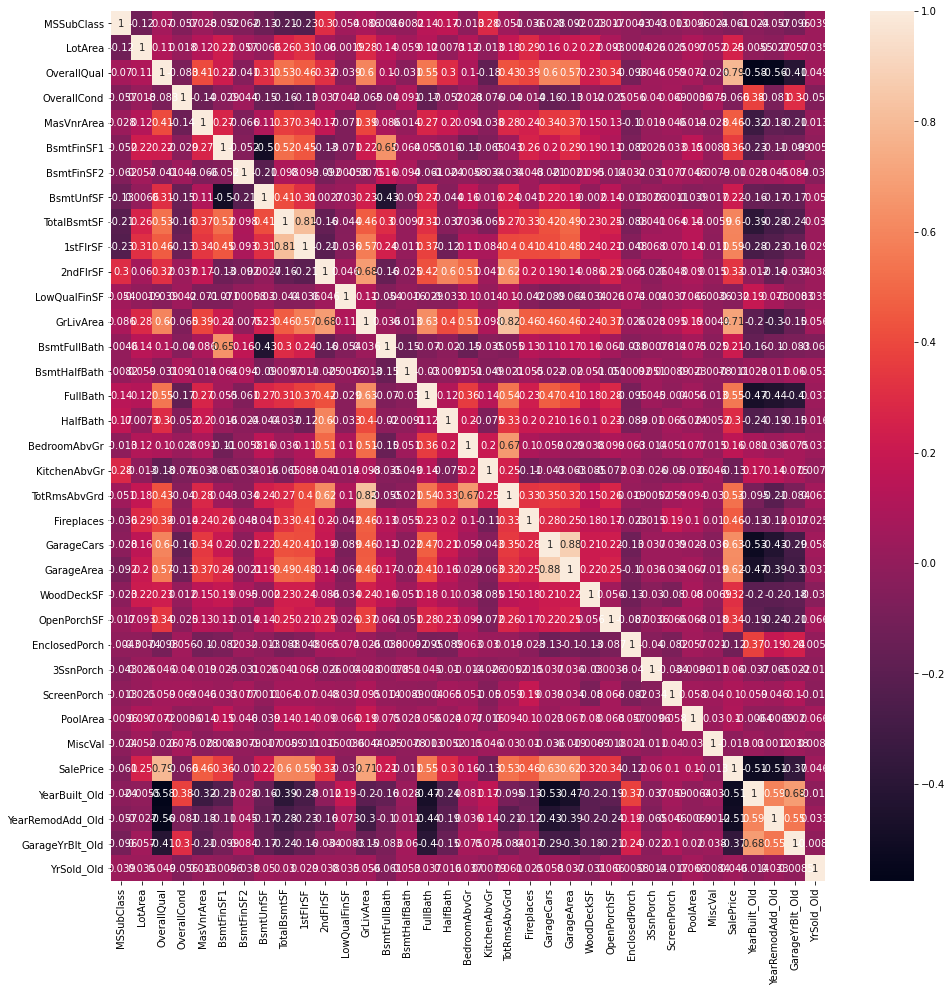

In [104]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [105]:
house_price.shape

(1168, 71)

In [106]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [107]:
house_price.shape

(1151, 71)

In [109]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [110]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,TA,Gd,TA,No,ALQ,Unf,TA,Y,TA,RFn,TA,TA,TA,IR1
1,Mod,Gd,TA,Gd,Gd,ALQ,Rec,Ex,Y,Gd,Unf,TA,TA,Gd,IR1
2,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,TA,Unf,TA,TA,TA,IR1
3,Gtl,TA,Gd,TA,No,BLQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,No,ALQ,Unf,Gd,Y,Gd,Fin,TA,TA,TA,IR1


In [111]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Lets take a look into the converted columns

In [112]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,2,4,3,1,5,1,2,1,2,2,3,3,2,0
1,1,3,3,4,4,5,3,4,1,3,1,3,3,3,0
2,0,3,4,3,3,6,1,4,1,2,1,3,3,2,0
3,0,2,4,3,1,4,1,4,1,2,2,3,3,2,0
4,0,3,4,3,1,5,1,3,1,3,3,3,3,2,0


In [113]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)


In [114]:
house_price = pd.concat([house_price,dummy_col],axis='columns')

In [115]:
house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Let us check the distribution of our target variable before scaling and Splitting

In [116]:
house_price[['SalePrice']].head()

,SalePrice
0,128000
1,268000
2,269790
3,190000
4,215000


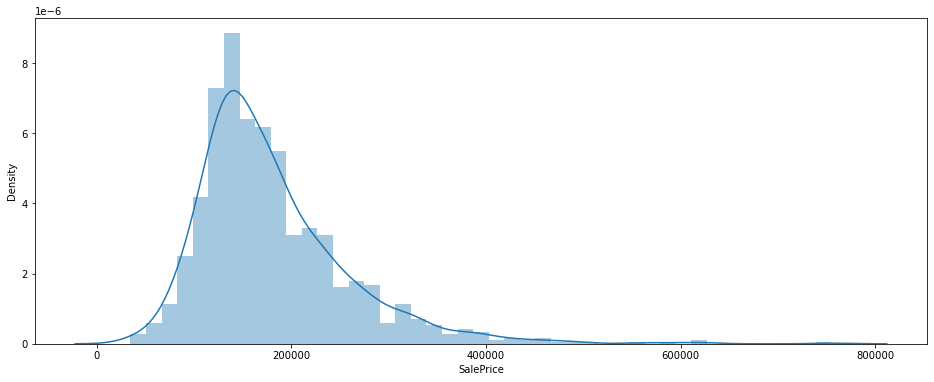

In [117]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

#### Creating train and test dataset for validation purpose

In [118]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [119]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,2,4,3,1,5,1,2,1,2,2,3,3,2,0
1,1,3,3,4,4,5,3,4,1,3,1,3,3,3,0
2,0,3,4,3,3,6,1,4,1,2,1,3,3,2,0
3,0,2,4,3,1,4,1,4,1,2,2,3,3,2,0
4,0,3,4,3,1,5,1,3,1,3,3,3,3,2,0


#### Scaling the train dataset

#### Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable

In [120]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

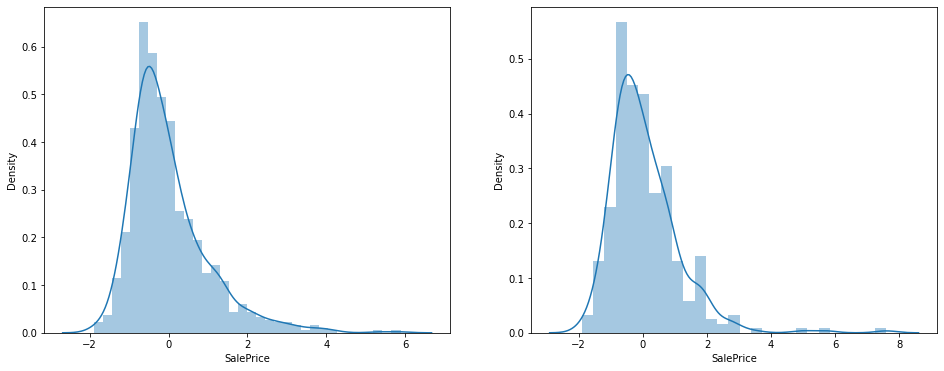

In [121]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [122]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [123]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Splitting the Dataset

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    house_price.drop('SalePrice', axis=1), house_price[['SalePrice']], 
    test_size=0.25, random_state=3)

#### Using Scikit-Learn, we can build a decision-tree model

In [125]:
from sklearn.tree import DecisionTreeRegressor

In [126]:
model = DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)

In [127]:
parameter_space = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}

clf = GridSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 15], 'max_features': [30, 45],
                         'min_samples_split': [5, 10]},
             scoring='neg_mean_absolute_error')

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
clf = RandomizedSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                         scoring="neg_mean_absolute_error", n_iter=100)

#### ElasticNet Regression

In [150]:
 from sklearn.linear_model import ElasticNet

In [151]:
ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
           precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
           warm_start=False, positive=False, random_state=None, selection='cyclic')

ElasticNet()

In [153]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 280, 'fit_intercept': True, 'l1_ratio': 1}


In [154]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

In [155]:
elasticNet_model.fit(X_train, y_train)

ElasticNet(alpha=280, l1_ratio=1, random_state=3)

In [156]:
from sklearn.metrics import mean_absolute_error

In [157]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 18418.80190546979


#### Nearest Neighbors

In [158]:
from sklearn.neighbors import KNeighborsRegressor

In [159]:
KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', 
                    leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                    n_jobs=None)

KNeighborsRegressor()

In [160]:
parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}


In [161]:
knn_model = KNeighborsRegressor(**clf.best_params_)

In [162]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, n_neighbors=9,
                    weights='distance')

In [163]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 27662.848345124512


#### Decision Tree

In [164]:
DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, 
                      random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, presort=False)

DecisionTreeRegressor(presort=False)

In [165]:
parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mae', 'max_features': 150, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [166]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [167]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_features=150, min_samples_leaf=3,
                      min_samples_split=5)

In [168]:
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 26639.71701388889


#### Neural Network

In [169]:
from sklearn.neural_network import MLPRegressor

In [170]:
MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
             alpha=0.0001, batch_size='auto', learning_rate='constant', 
             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
             random_state=None, tol=0.0001, verbose=False, warm_start=False, 
             momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
             n_iter_no_change=10)

MLPRegressor()

In [171]:
from sklearn.neural_network import MLPRegressor

parameter_space = \
    {
        "hidden_layer_sizes": [(7,)*3, (19,), (100,), (154,)],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs"],
        "alpha": [1, 10, 100],
    }

clf = GridSearchCV(MLPRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'activation': 'identity', 'alpha': 10, 'hidden_layer_sizes': (154,), 'solver': 'lbfgs'}


In [172]:
nn_model = MLPRegressor(**clf.best_params_)

In [173]:
nn_model.fit(X_train, y_train)

MLPRegressor(activation='identity', alpha=10, hidden_layer_sizes=(154,),
             solver='lbfgs')

In [174]:
y_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE =", nn_mae)

Neural Network MAE = 24809.91568099562


#### Random Forest

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
RandomForestRegressor(n_estimators='warn', criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, oob_score=False, 
                      n_jobs=None, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(n_estimators='warn')

In [177]:
parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'mse', 'bootstrap': False}


In [178]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [179]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=254, max_features=19,
                      n_estimators=600)

In [180]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 15968.76863425926


#### Gradient Boosting

In [62]:
from xgboost import XGBRegressor

In [61]:
pip install xgboost

In [128]:
XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
             objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, 
             gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
             colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
             missing=None, importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [129]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 25, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [130]:
xgb_model = XGBRegressor(**clf.best_params_)

In [131]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.5, gamma=25, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=33, reg_lambda=3, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 15259.293674045139


#### Ridge Regression

In [143]:
from sklearn.linear_model import Ridge

In [145]:
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver='auto', random_state=None)

Ridge()

In [146]:
parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 100, 'fit_intercept': True, 'solver': 'svd'}


In [147]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

In [148]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=100, random_state=3, solver='svd')

In [149]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 18915.564370006905


#### Analysis and Comparison

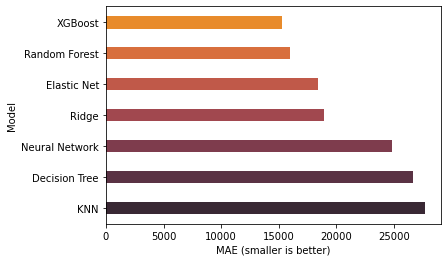

In [182]:
x = ['KNN', 'Decision Tree', 'Neural Network', 'Ridge', 
     'Elastic Net', 'Random Forest', 'XGBoost']
y = [27662.84, 26639.71,  24809.91,  18915.56, 18418.80,
     15968.76, 15259.293]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

<AxesSubplot:xlabel='SalePrice'>

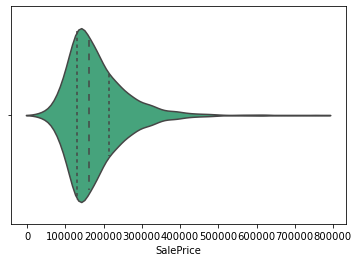

In [184]:
sns.violinplot(x=house_price['SalePrice'], inner="quartile", color="#36B37E")

<AxesSubplot:xlabel='SalePrice'>

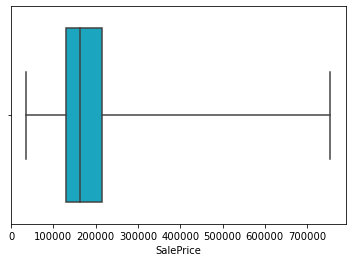

In [186]:
sns.boxplot(house_price['SalePrice'], whis=10, color="#00B8D9")

<AxesSubplot:xlabel='SalePrice'>

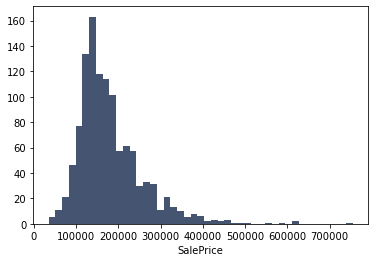

In [187]:
sns.distplot(house_price['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8})

In [188]:
y_train.describe(include=[np.number])

,SalePrice
count,863.000000
mean,180234.867903
std,78786.664438
min,34900.000000
25%,130750.000000
50%,162500.000000
75%,213125.000000
max,755000.000000


### Feature Importances

#### XGBoost

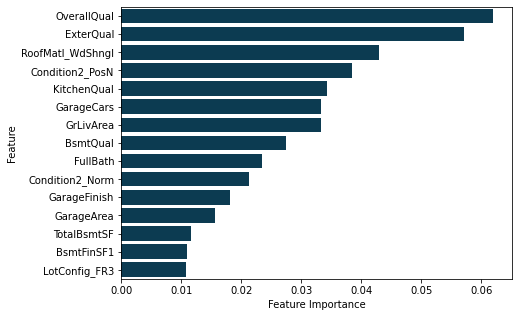

In [189]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

#### Random Forest

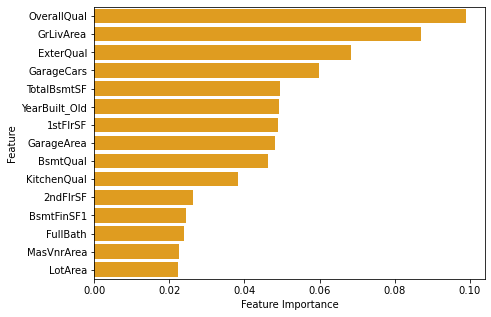

In [190]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Common Important Features

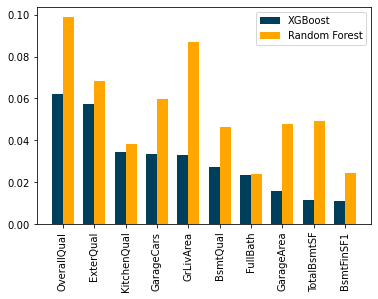

In [191]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
       color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width, 
       color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

#### Now using RFE lets try to to find the optimal number of feature

#### Note : I cannot use RFE with GridSearchCV as 190 variable with 5 folds will create 960 fit and it will take more then 1 Hour to get the result so i am using RFE directly

In [193]:
len(X_train.columns)


190

In [194]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [195]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [196]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [197]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lets try first with the Lasso regression model

In [198]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8631598454003531
0.8256553781291937


#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [200]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    4.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [201]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.112499,0.066220,0.039063,0.112078,0.001,{'alpha': 0.001},0.810753,0.788815,0.839770,0.830061,...,0.861604,0.863657,0.872399,0.862422,0.864624,0.869814,0.862869,0.862007,0.865174,0.003398
1,0.051562,0.014063,0.007813,0.007813,0.010,{'alpha': 0.01},0.810756,0.788811,0.839776,0.830065,...,0.861604,0.863657,0.872399,0.862422,0.864624,0.869814,0.862869,0.862007,0.865174,0.003398
2,0.032812,0.004687,0.004688,0.007161,0.100,{'alpha': 0.1},0.810795,0.788772,0.839828,0.830097,...,0.861604,0.863657,0.872399,0.862422,0.864624,0.869814,0.862869,0.862007,0.865174,0.003398
3,0.033287,0.011439,0.010215,0.006226,1.000,{'alpha': 1.0},0.811181,0.788376,0.840334,0.830419,...,0.861600,0.863652,0.872394,0.862418,0.864620,0.869810,0.862864,0.862003,0.865170,0.003398
4,0.023258,0.007675,0.002463,0.004738,5.000,{'alpha': 5.0},0.812833,0.786502,0.842194,0.831777,...,0.861499,0.863538,0.872268,0.862305,0.864521,0.869717,0.862763,0.861908,0.865064,0.003395


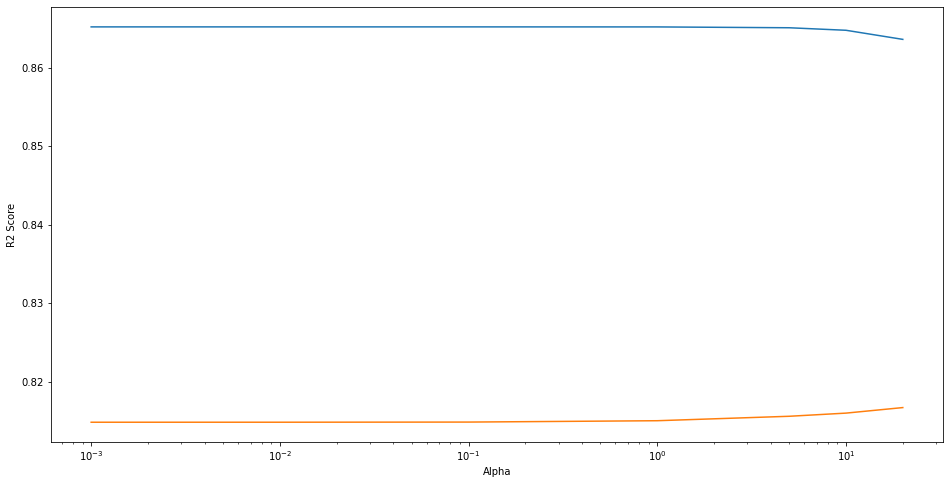

In [202]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [205]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [215]:
lasso = Lasso(alpha=20.0)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8613470858592673
0.8299285678610188


In [216]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [217]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
40,EnclosedPorch,126245
21,2ndFlrSF,69887.6
24,BsmtFullBath,54787.4
22,LowQualFinSF,54290
67,Neighborhood_Gilbert,38861.8
28,BedroomAbvGr,35946.2
69,Neighborhood_MeadowV,34535.2
53,LandContour_HLS,28428.9
6,MasVnrArea,26577.3
12,BsmtFinType1,25106.7


### Now lets use the ridge regression

In [209]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8631598323774055
0.8248821750240919


#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV¶

In [210]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [211]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.012500,0.006250,0.006251,0.007655,0.001,{'alpha': 0.001},0.810864,0.788812,0.839791,0.830120,...,0.861604,0.863657,0.872399,0.862422,0.864624,0.869814,0.862869,0.862007,0.865174,0.003398
1,0.006250,0.007655,0.004688,0.007161,0.010,{'alpha': 0.01},0.811849,0.788783,0.839971,0.830640,...,0.861603,0.863655,0.872398,0.862421,0.864622,0.869812,0.862867,0.862005,0.865173,0.003398
2,0.012500,0.006250,0.000000,0.000000,0.100,{'alpha': 0.1},0.820232,0.788532,0.841208,0.835364,...,0.861494,0.863505,0.872299,0.862299,0.864515,0.869703,0.862754,0.861868,0.865046,0.003406
3,0.012500,0.006250,0.004687,0.007160,0.200,{'alpha': 0.2},0.827146,0.788328,0.841898,0.839797,...,0.861247,0.863153,0.872082,0.862015,0.864262,0.869440,0.862490,0.861562,0.864754,0.003425
4,0.004688,0.007161,0.010938,0.007161,0.500,{'alpha': 0.5},0.839378,0.788021,0.842587,0.849699,...,0.860201,0.861612,0.871215,0.860797,0.863158,0.868252,0.861332,0.860306,0.863502,0.003519


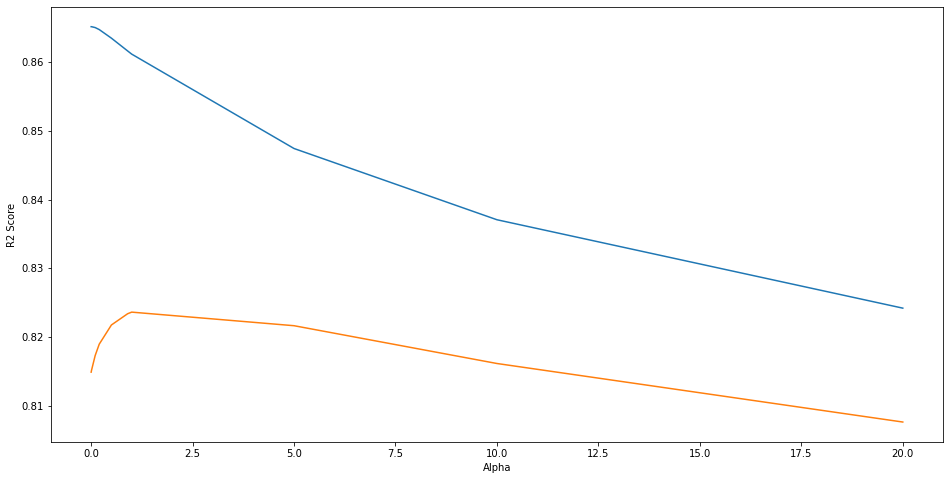

In [212]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [213]:
 #Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [214]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8596983517178257
0.8352460164432147


In [218]:
odel_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [219]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
41,3SsnPorch,133240
22,LowQualFinSF,71806.3
68,Neighborhood_IDOTRR,60612.2
25,BsmtHalfBath,58542.5
70,Neighborhood_Mitchel,58220.8
23,GrLivArea,58005.5
29,KitchenAbvGr,57565.2
65,Neighborhood_Crawfor,45272.3
13,BsmtFinSF1,39853
52,MSZoning_RM,38783.8


#### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

### Final Model

In [220]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8631598454003531
0.8256553781291937
